<a href="https://colab.research.google.com/github/SuminBae97/MachineLearning/blob/master/torch_tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
import requests
import pickle
import gzip
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).contentW
        (PATH / FILENAME).open("wb").write(content)
with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")        

In [8]:
x_train.shape,y_train.shape

((50000, 784), (50000,))

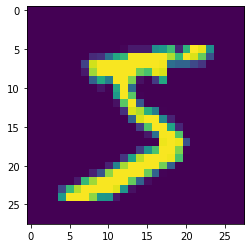

In [13]:
plt.imshow(x_train[0].reshape((28,28)))

In [14]:
import torch

In [15]:
data = [[1,2],[3,4]]
x = torch.tensor(data)

In [16]:
x

tensor([[1, 2],
        [3, 4]])

In [17]:
xones = torch.ones_like(x)

In [20]:
xones

tensor([[1, 1],
        [1, 1]])

In [24]:
shape=(3,3)
r_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

In [25]:
r_tensor,ones_tensor,zeros_tensor

(tensor([[0.7420, 0.5593, 0.6736],
         [0.1447, 0.0538, 0.8896],
         [0.8130, 0.3802, 0.5336]]), tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]), tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]))

In [27]:
r_tensor.shape,r_tensor.dtype,r_tensor.device

(torch.Size([3, 3]), torch.float32, device(type='cpu'))

In [30]:
if torch.cuda.is_available():
    r_tensor = r_tensor.to('cuda')

In [32]:
tensor = torch.ones(4,4)

In [41]:
tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [46]:
#torch.cat, torch.stack
torch.cat([tensor,tensor],dim=1) 

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [51]:
tensor = torch.ones(2,4)

In [52]:
#matmul
tensor@tensor.T ,  tensor.matmul(tensor.T)

(tensor([[4., 4.],
         [4., 4.]]), tensor([[4., 4.],
         [4., 4.]]))

In [53]:
tensor@tensor.T

tensor([[4., 4.],
        [4., 4.]])

In [54]:
tensor.matmul(tensor.T)

tensor([[4., 4.],
        [4., 4.]])

In [55]:
tensor*tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [60]:
tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [58]:
tensor.sum(axis=0)

tensor([2., 2., 2., 2.])

In [61]:
tensor.sum(axis=1)

tensor([4., 4.])

In [62]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [76]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [78]:
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()

In [79]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

In [81]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [82]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cuda device


In [83]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(nn.Linear(28*28,512), nn.ReLU(),nn.Linear(512,256), nn.ReLU(), nn.Linear(256,10))

    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
        


In [98]:
model = NeuralNetwork().to(device)

In [99]:
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [100]:
test = torch.rand(1,28,28,device=device)


In [101]:
logits= model(test)

In [103]:
pred_prob = nn.Softmax(dim=1)(logits)

In [105]:
pred_prob.argmax(1)

tensor([2], device='cuda:0')

In [106]:
input_image = torch.rand(3,28,28)

In [ ]:
for img in input_image:
    plt.figure(figsize=(5,5))
    plt.imshow(img)

<h1>nn.Flatten</h1>

In [110]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [111]:
layer1 = nn.Linear(in_features=28*28,out_features=20)
hidden1 = layer1(flat_image)

In [112]:
hidden1.size()

torch.Size([3, 20])

In [113]:
hidden1 = nn.ReLU(hidden1)

<h1>Sequential model</h1>

In [114]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10)
)

In [115]:
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [117]:
logits

tensor([[-0.2908,  0.3258,  0.3841, -0.0992, -0.1049,  0.2884,  0.0840,  0.0055,
         -0.4230, -0.2649],
        [-0.4055,  0.3426,  0.4802, -0.1002, -0.0575,  0.1737,  0.1185,  0.1260,
         -0.5114, -0.2380],
        [-0.4095,  0.3079,  0.5387, -0.1140, -0.0899,  0.2282,  0.1806,  0.1723,
         -0.5642, -0.1745]], grad_fn=<AddmmBackward0>)

In [118]:
softmax = nn.Softmax(dim=1)
pred_prob = softmax(logits)